# **KHÁM PHÁ VÀ TIỀN XỬ LÝ DỮ LIỆU**

---

# I. THU THẬP DỮ LIỆU

- Chủ đề dữ liệu: Renewable Energy and Weather Conditions (Năng lượng tái tạo và điều kiện thời tiết)
- Nguồn dữ liệu: Dữ liệu được download từ trang web `Kaggle` và lưu vào google drive dưới dạng file csv
- Link dataset: [Renewable Energy and Weather Conditions](https://www.kaggle.com/datasets/samanemami/renewable-energy-and-weather-conditions)

# II. KHÁM PHÁ DỮ LIỆU

Import các thư viện cần thiết

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np

Đọc dữ liệu từ đường dẫn gg drive

In [2]:
with open('../Datasets/solar_weather_link.txt') as f:
    link = f.readline()

FILE_ID = link.split("/d/")[1].split("/view")[0]

In [3]:
url = f'https://drive.google.com/uc?id={FILE_ID}&export=download'
df = pd.read_csv(url)
df.head()

,Time,Energy delta[Wh],GHI,temp,pressure,humidity,wind_speed,rain_1h,snow_1h,clouds_all,isSun,sunlightTime,dayLength,SunlightTime/daylength,weather_type,hour,month
0,2017-01-01 00:00:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,0,1
1,2017-01-01 00:15:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,0,1
2,2017-01-01 00:30:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,0,1
3,2017-01-01 00:45:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,0,1
4,2017-01-01 01:00:00,0,0.0,1.7,1020,100,5.2,0.0,0.0,100,0,0,450,0.0,4,1,1


### 1. Dữ liệu có bao nhiêu dòng, cột? 

In [4]:
df.shape

(196776, 17)

### 2. Thông tin về các dòng dữ liệu

#### 2.1 Ý nghĩa từng dòng dữ liệu

- Mỗi dòng là đại diện cho thông tin chi tiết tại một thời điểm nhất định bao gồm thời điểm dữ liệu được ghi lại, các thông số thời tiết (như nhiệt độ, tốc độ gió, độ ẩm, ...) và sản lượng năng lượng tái tạo được tạo ra tại thời điểm đó.

- Không có dòng nào có ý nghĩa khác với các dòng còn lại.

#### 2.2 Kiểm tra các dòng dữ liệu trùng lặp

In [5]:
n_duplicate = df.duplicated().sum()
print(f"Số dòng dữ liệu bị trùng lặp: {n_duplicate}")

Số dòng dữ liệu bị trùng lặp: 0


In [6]:
if n_duplicate > 0:
    df.drop_duplicates()

df.shape

(196776, 17)

Qua kiểm tra, ta thấy dữ liệu không bị trùng lặp. Ta tiến hành bước tiếp theo. 

### 3. Thông tin về các cột dữ liệu

Dữ liệu có các cột sau

In [7]:
df.columns

Index(['Time', 'Energy delta[Wh]', 'GHI', 'temp', 'pressure', 'humidity',
       'wind_speed', 'rain_1h', 'snow_1h', 'clouds_all', 'isSun',
       'sunlightTime', 'dayLength', 'SunlightTime/daylength', 'weather_type',
       'hour', 'month'],
      dtype='object')

#### 3.1 Ý nghĩa của các cột dữ liệu

Theo mô tả dữ liệu trên Kaggle, mỗi cột có ý nghĩa như sau:
|Tên cột|Ý nghĩa|
|-------|-------|
| Time| Thời gian ghi nhận dữ liệu theo định dạng ngày và giờ|
| Energy delta[Wh]| Chênh lệch về mức tiêu thụ năng lượng (Watt-hour) từ mốc thời gian trước đến thời gian hiện tại|
| GHI| Bức xạ mặt trời toàn cầu trên bề mặt ngang (W/m²)|
| temp| Nhiệt độ không khí (°C)|
| pressure| Áp suất khí quyển (hPa)|
| humidity| Độ ẩm không khí (%)|
| wind_speed| Tốc độ gió (m/s)|
| rain_1h| Lượng mưa trong giờ qua (mm)|
| snow_1h| Lượng tuyết rơi (mm)|
| clouds_all| Tỷ lệ che phủ của mây (%)|
| isSun| Cho biết có ánh sáng mặt trời tại thời điểm đó hay không|
| sunlightTime| Tổng thời gian có ánh sáng mặt trời trong ngày (phút)|
| dayLength| Độ dài ngày tính từ lúc mặt trời mọc cho đến lúc mặt trời lặn (phút)|
| SunlightTime/daylength| Tỷ lệ thời gian có ánh sáng mặt trời so với tổng thời gian ban ngày|
| weather_type| Loại thời tiết (trời quang, nhiều mây hoặc mưa)|
| hour| Giờ trong ngày (0-23)|
| month| Tháng trong năm (1-12)|

Ý nghĩa thông số trong cột **weather_type**:
 - 1: (clear) trời quang, bầu trời không có mây hoặc mây cực ít
 - 2: (partly cloudy), mây phủ một phần bầu trời, nhưng không nhiều
 - 3: (cloudy) trời nhiều mây
 - 4: (overcast) mây phủ hoàn toàn
 - 5: (rainy), điều kiện thời tiết có gió mạnh, có thể có mưa hoặc tuyết  

#### 3.2 Kiểm tra kiểu dữ liệu của mỗi cột 

- Kiểu dữ liệu hiện tại của các cột

In [8]:
column_types = df.dtypes
column_types

Time                       object
Energy delta[Wh]            int64
GHI                       float64
temp                      float64
pressure                    int64
humidity                    int64
wind_speed                float64
rain_1h                   float64
snow_1h                   float64
clouds_all                  int64
isSun                       int64
sunlightTime                int64
dayLength                   int64
SunlightTime/daylength    float64
weather_type                int64
hour                        int64
month                       int64
dtype: object

- Nhận xét: 
    + Trong dataframe, cột **isSun** và cột **weather_type** có kiểu int64, tuy nhiên ý nghĩa của 2 cột này mà nhóm đã tìm hiểu thì 2 cột này nên có kiểu phân loại, với cột **isSun** là `boolean` và cột **weather_type** là `category`. 
    
    + Mặt khác, cột **Time** có dữ liệu thời gian nhưng hiện tại nó đang có kiểu object. Nhóm sẽ đổi kiểu dữ liệu về `datetime`.

    + Cột **month** và **hour** là thông tin về tháng trong năm và giờ trong ngày. Vì giá trị trong các cột này có phạm vi hạn chế nên nhóm sẽ chuyển về kiểu `category`.

In [10]:
df['isSun'].value_counts(normalize = False, sort=True, ascending = True)

isSun
0     94460
1    102316
Name: count, dtype: int64

In [ ]:
# Đổi kiểu dữ liệu của isSun
df['isSun'] = df['isSun'].astype('category')

In [ ]:
df['weather_type'].value_counts(normalize = False, sort=True, ascending = True)

weather_type
1    27976
5    28708
3    31660
2    35428
4    73004
Name: count, dtype: int64

In [ ]:
# Đổi kiểu dữ liệu của weather_type
df['weather_type'] = df['weather_type'].astype('category')

In [ ]:
# Đổi kiểu dữ liệu của time
df['Time'] = pd.to_datetime(df['Time'])

In [ ]:
# Đổi kiểu dữ liệu của month và hour
df['month'] = df['month'].astype('category')
df['hour'] = df['hour'].astype('category')

In [18]:
# Kiểm tra lại
df.dtypes

Time                      datetime64[ns]
Energy delta[Wh]                   int64
GHI                              float64
temp                             float64
pressure                           int64
humidity                           int64
wind_speed                       float64
rain_1h                          float64
snow_1h                          float64
clouds_all                         int64
isSun                           category
sunlightTime                       int64
dayLength                          int64
SunlightTime/daylength           float64
weather_type                    category
hour                            category
month                           category
dtype: object

Dữ liệu trong dataframe đã được xác định với các kiểu dữ liệu phù hợp cho từng cột.

#### 3.3 Sự phân bố dữ liệu của các cột có kiểu định lượng

Các cột có kiểu dữ liệu định lượng

In [19]:
numerical_columns = df.select_dtypes(include=['int64', 'float64', 'float32']).columns.tolist()
print('Numberical columns: ')
for col_name in numerical_columns:
    print(col_name)

Numberical columns: 
Energy delta[Wh]
GHI
temp
pressure
humidity
wind_speed
rain_1h
snow_1h
clouds_all
sunlightTime
dayLength
SunlightTime/daylength


- Sự phân bố dữ liệu của các cột
  Từ mô tả của dữ liệu và đánh giá sơ bộ, nhóm nhận thấy rằng trong các cột này thì dữ liệu của các cột **Energy delta[Wh], GHI, temp, pressure, humidity, wind_speed, rain_1h, snow_1h, clouds_all, sunlightTime, dayLength, SunlightTime/daylength** là liên tục. Vì vậy nhóm sẽ sử dụng biểu đồ `histogram` cho cột có kiểu dữ liệu liên tục để trực quan hóa phân bố giá trị của các cột này.  

In [ ]:
# Danh sách các cột tương ứng với histogram
histogram_columns = ['Energy delta[Wh]', 'GHI', 'temp', 'pressure', 'humidity', 'wind_speed', 'rain_1h', 'snow_1h', 'clouds_all', 'sunlightTime', 'dayLength', 'SunlightTime/daylength']

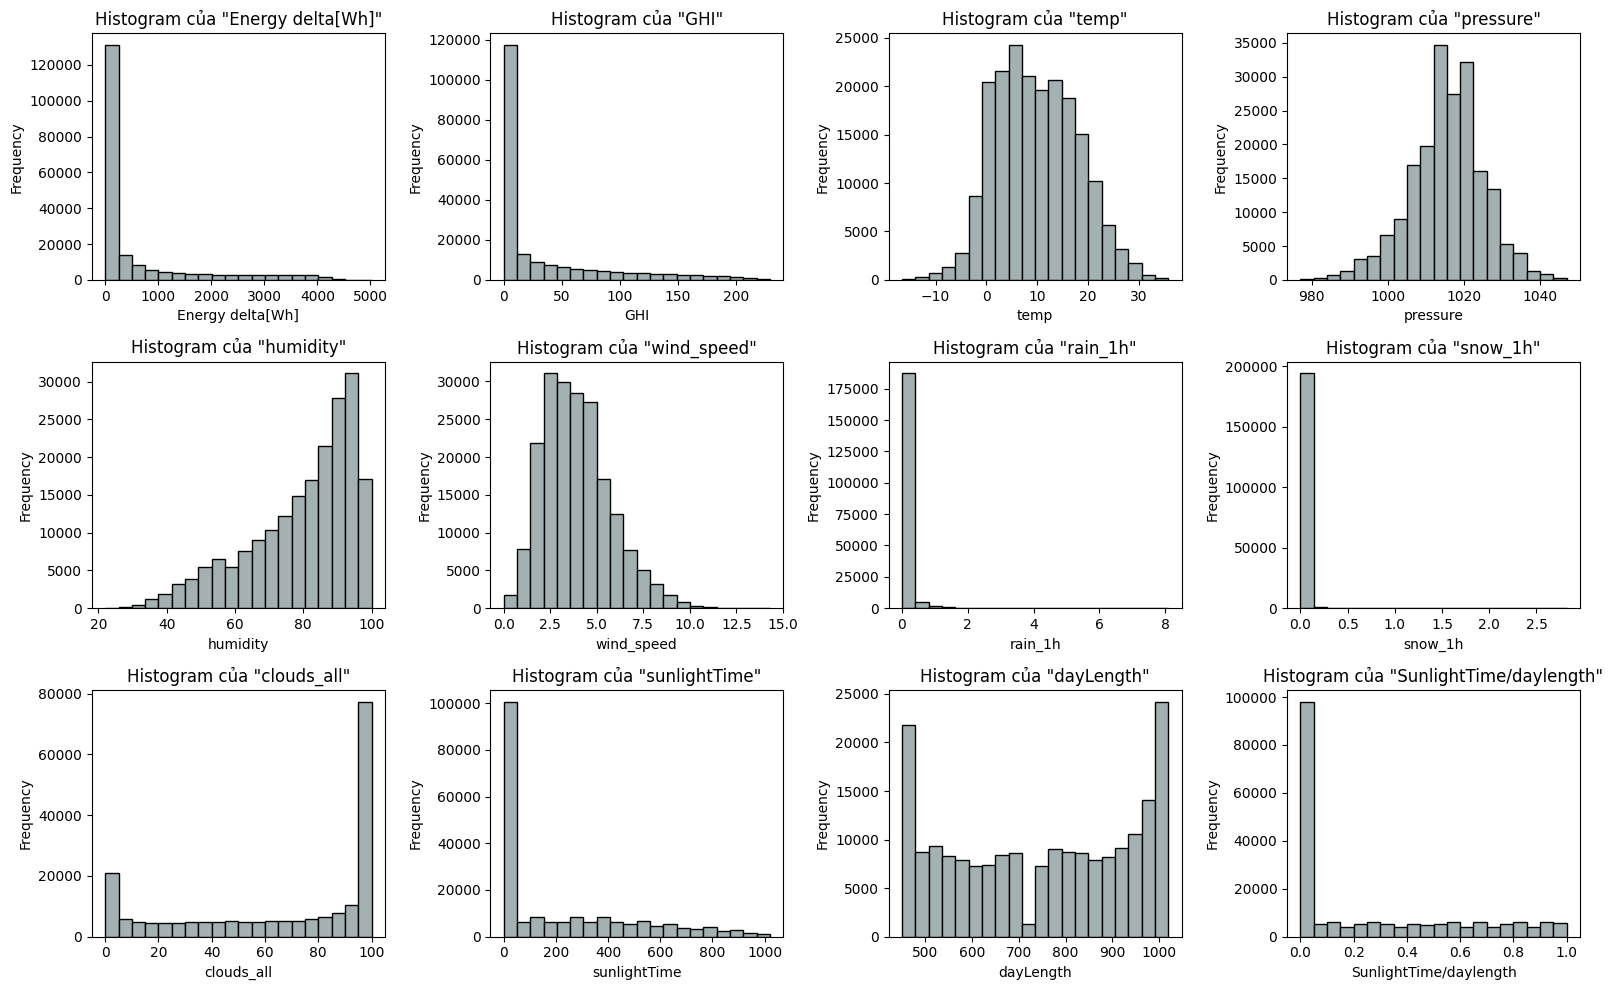

In [ ]:
# Vẽ biểu đồ phân bố giá trị của các cột
numerical_fig, numerical_axes = plt.subplots(3, 4, figsize=(16, 10))

for i, col_name in enumerate(histogram_columns):
    ax = numerical_axes[i // 4, i % 4]  
    ax.hist(df[col_name].dropna(), bins=20, color = '#A3B1B3', edgecolor='black')
    ax.set_title(f'Histogram của "{col_name}"')
    ax.set_xlabel(col_name)
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

##### 3.3.1 Tỉ lệ phần trăm các giá trị bị thiếu trong mỗi cột

In [20]:
for col_name in numerical_columns:
    print(f'{col_name}: {df[col_name].isnull().mean()*100}%')

Energy delta[Wh]: 0.0%
GHI: 0.0%
temp: 0.0%
pressure: 0.0%
humidity: 0.0%
wind_speed: 0.0%
rain_1h: 0.0%
snow_1h: 0.0%
clouds_all: 0.0%
sunlightTime: 0.0%
dayLength: 0.0%
SunlightTime/daylength: 0.0%


- Nhận xét: Dữ liệu trong các cột dữ liệu dạng định lượng (numerical columns) của dataframe không có bất kỳ giá trị nào bị thiếu. 

##### 3.3.2 Tính toán các giá trị thống kê 

In [21]:
numerical_statistic = df.describe()
numerical_statistic

,Time,Energy delta[Wh],GHI,temp,pressure,humidity,wind_speed,rain_1h,snow_1h,clouds_all,sunlightTime,dayLength,SunlightTime/daylength
count,196776,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000
mean,2019-10-29 22:44:12.085620992,573.008228,32.596538,9.790521,1015.292780,79.810566,3.937746,0.066035,0.007148,65.974387,211.721094,748.644347,0.265187
min,2017-01-01 00:00:00,0.000000,0.000000,-16.600000,977.000000,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000,450.000000,0.000000
25%,2018-06-02 10:26:15,0.000000,0.000000,3.600000,1010.000000,70.000000,2.600000,0.000000,0.000000,34.000000,0.000000,570.000000,0.000000
50%,2019-10-28 20:52:30,0.000000,1.600000,9.300000,1016.000000,84.000000,3.700000,0.000000,0.000000,82.000000,30.000000,765.000000,0.050000
75%,2021-03-24 07:18:45,577.000000,46.800000,15.700000,1021.000000,92.000000,5.000000,0.000000,0.000000,100.000000,390.000000,930.000000,0.530000
max,2022-08-31 17:45:00,5020.000000,229.200000,35.800000,1047.000000,100.000000,14.300000,8.090000,2.820000,100.000000,1020.000000,1020.000000,1.000000
std,NaN,1044.824047,52.172018,7.995428,9.585773,15.604459,1.821694,0.278913,0.069710,36.628593,273.902186,194.870208,0.329023


- Nhận xét: 
Các cột như Energy delta[Wh], GHI, Temp, Pressure, Humidity, Wind Speed, Rain_1h, Snow_1h, Clouds_all, và SunlightTime có thể chứa một số giá trị outlier, nhưng đa phần là hợp lý trong ngữ cảnh nghiên cứu.

#### 3.4 Sự phân bố giá trị của các cột có kiểu định tính

- Các cột có kiểu dữ liệu định tính

In [25]:
categorical_columns = df.select_dtypes(include=['object', 'bool', 'category']).columns.tolist()
print('Categorical columns: ')
for col_name in categorical_columns:
    print(col_name)

Categorical columns: 
isSun
weather_type
hour
month


##### 3.4.1 Số giá trị phân biệt của mỗi cột

In [26]:
# Hàm tính toán sự phân bố các giá trị
def compute_distribution(dataframe, column):
    value_counts = dataframe[column].value_counts(dropna=False) 
    db = {}
    for value, count in value_counts.items():
        db[value] = count
    
    return db

In [27]:
# Tìm phân bố giá trị
cat_distribution = {}

for column in categorical_columns:
    cat_distribution[column] = compute_distribution(df, column)

In [28]:
# Chuyển thành dạng bảng
# Tạo danh sách để lưu dữ liệu cho DataFrame
data = {
    "Column": [],
    "Distinct_Values": [],
    "Value_Distribution": []
}

# Thêm dữ liệu vào danh sách
for column, distribution in cat_distribution.items():
    different_values = len(set(df[column]))
    data["Column"].append(column)
    data["Distinct_Values"].append(different_values)
    data["Value_Distribution"].append(distribution)

# Tạo DataFrame từ dữ liệu
distribution_df = pd.DataFrame(data)

# In ra DataFrame
distribution_df

,Column,Distinct_Values,Value_Distribution
0,isSun,2,"{1: 102316, 0: 94460}"
1,weather_type,5,"{4: 73004, 2: 35428, 3: 31660, 5: 28708, 1: 27..."
2,hour,24,"{0: 8200, 10: 8200, 17: 8200, 16: 8200, 15: 82..."
3,month,12,"{3: 17856, 5: 17856, 7: 17856, 8: 17832, 4: 17..."


##### 3.4.2 Tỉ lệ phần trăm các giá trị bị thiếu trong mỗi cột

In [29]:
for col_name in categorical_columns:
    missing_rate = df[col_name].isnull().mean() * 100
    print(f'{col_name}: {missing_rate:.2f}%')

isSun: 0.00%
weather_type: 0.00%
hour: 0.00%
month: 0.00%


- Nhận xét: Dữ liệu trong các cột dữ liệu dạng định tính (categorical columns) của dataframe không có bất kỳ giá trị nào bị thiếu. 

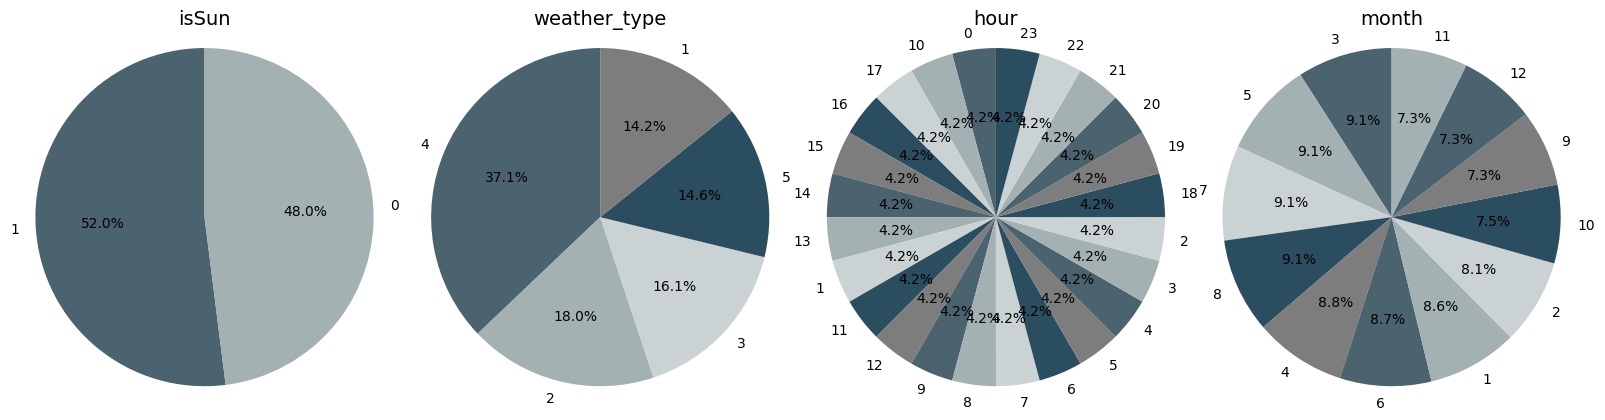

In [30]:
# Vẽ biểu đồ phân bố giá trị của các cột
numerical_fig, numerical_axes = plt.subplots(nrows=4, ncols=4, figsize=(16, 16))
numerical_axes = numerical_axes.flatten()

plot_count = 0

colors = ['#4A636E', '#A3B1B3','#CAD2D3', '#2B4D60', '#7D7D7D']

for column, distribution in cat_distribution.items():
    if plot_count >= 16:
        break

    labels = list(distribution.keys())
    counts = list(distribution.values())

    numerical_axes[plot_count].pie(counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
    numerical_axes[plot_count].axis('equal') 
    numerical_axes[plot_count].set_title(f'{column}', fontsize=14)

    plot_count += 1

for i in range(plot_count, 16):
    numerical_fig.delaxes(numerical_axes[i])

plt.tight_layout()
plt.show()

Sau các bước tiền xử lý, ta thực hiện lưu dataframe này vào 1 file mới và thực hiện các trực quan hóa trên file này.

In [23]:
#df.to_csv('../Data/StudentPerformanceFactors_clean.csv', index=False)